# Displaying individual sections

In [1]:
import tslumen
from tslumen.report.html import sections
import pandas as pd

In [2]:
# patch it
_read_csv = pd.read_csv
pd.read_csv = lambda fpath, *args, **kwargs: _read_csv(fpath.split('/')[-1], *args, **kwargs)

In [3]:
df = pd.read_csv('https://datahub.io/core/s-and-p-500/r/data.csv', parse_dates=[0], index_col=0)
df = df[(df.index >= '1990-01-01') & (df.index < '2015-01-01')]
meta = {
    'frame': {
        'Description': '''S&P 500 index data including level, dividend, earnings and P/E ratio on 
a monthly basis since 1870. The S&P 500 (Standard and Poor’s 500) is a free-float, 
capitalization-weighted index of the top 500 publicly listed stocks in the US (top 500 by market cap)''',
        'Source': '<a href="https://datahub.io/core/s-and-p-500">DataHub</a>',
    },
    'series': {
        'SP500': "Level ('price') of the S&P 500 index",
        'Dividend': 'Dividend',
        'Earnings': 'Earnings',
        'Consumer Price Index': 'Consumer Price Index',
        'Long Interest Rate': '10 year interest rate (gov bonds)',
        'Real Price': 'Real Price',
        'Real Dividend': 'Real Dividend',
        'Real Earnings': 'Real Earnings',
        'PE10': 'Cyclically Adjusted Price Earnings Ratio P/E10 or CAPE',
    }
}

In [4]:
profile = tslumen.DefaultProfiler().profile(df)

Profiling:   0%|          | 0/462 [00:00<?, ?it/s]


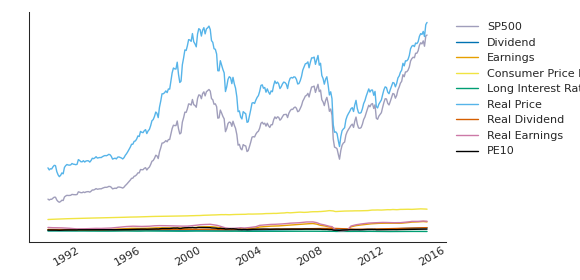
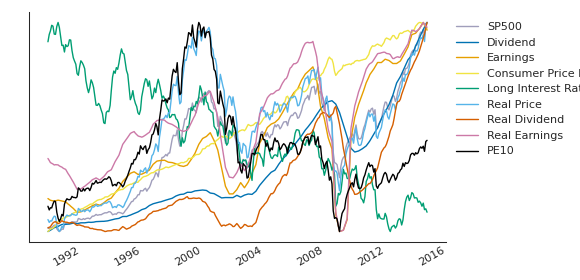

In [5]:
sections.SectionSummary(profile, meta, df)